In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Mystery Function Definition

def mystery_G(u):
  y = np.zeros(len(u))
  y[0] = u[0]
  for i in range(1, len(u)):
    y[i] = 0.05 * y[i-1] + 0.3 * u[i-1] + u[i]
  return y

## Learning an Estimate of G

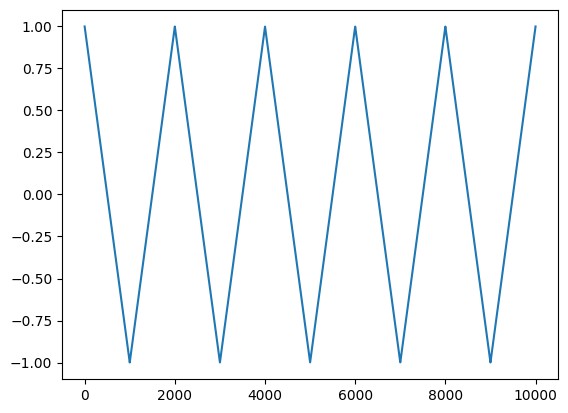

In [37]:
## CHANGE THIS CELL to try out better inputs!
N = 10000
t = np.linspace(0, 1, N)
u = 2 * np.abs(2 * (t * 5 % 1) - 1) - 1
plt.plot(u)

In [38]:
# Construct estimate of our mystery G
y = mystery_G(u)

u_dft = np.fft.fft(u)
y_dft = np.fft.fft(y)

## This code is complicated to deal with divide by 0 errors, but exactly captures our estimation equation.
G_est = np.divide(y_dft, u_dft, out=np.zeros_like(y_dft), where=np.abs(u_dft) >= 0.0001)

## Testing our Estimate of G

In [39]:
u_star = np.linspace(0, 3, N) + np.cos(np.linspace(0, 2, N))
y_star = mystery_G(u_star)

u_star_dft = np.fft.fft(u_star)
y_est_dft = np.multiply(G_est, u_star_dft)

In [40]:
y_est = np.fft.ifft(y_est_dft)

In [41]:
mean_squared_error = np.mean(np.abs(y_est - y_star)**2)
print(mean_squared_error)

21.56341112108968


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Value')

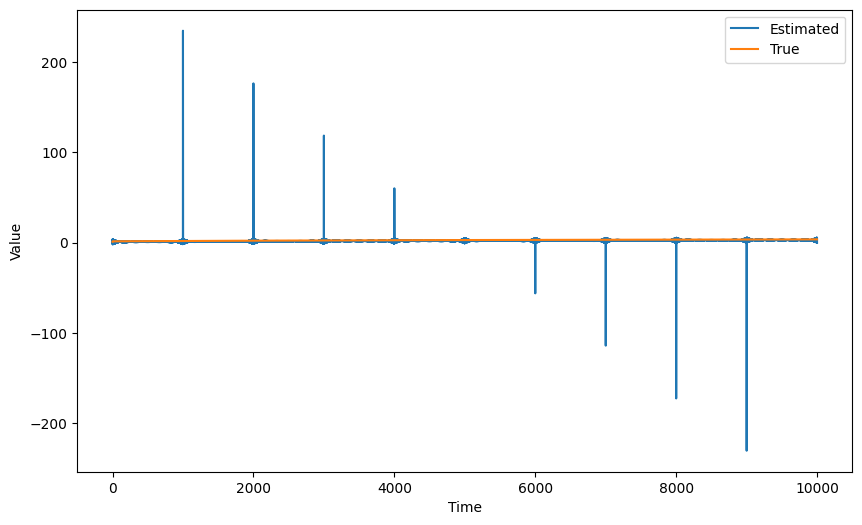

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(y_est, label='Estimated')
ax.plot(y_star, label='True')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Value')